# Aula 1

## Vídeo 1.2

In [2]:
import pandas as pd

In [3]:
carbonico = pd.read_csv('co2.csv',sep='\t')

In [4]:
carbonico.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [5]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

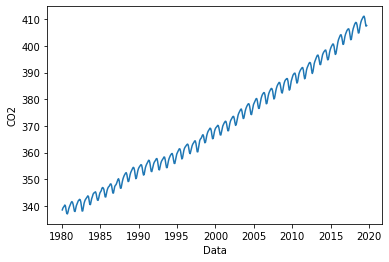

In [6]:
plt.plot(carbonico['data'],carbonico['media'])
plt.ylabel('CO2')
plt.xlabel('Data')

In [7]:
nasc = pd.read_csv('nascimentos.csv')

In [8]:
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 0, 'Data')

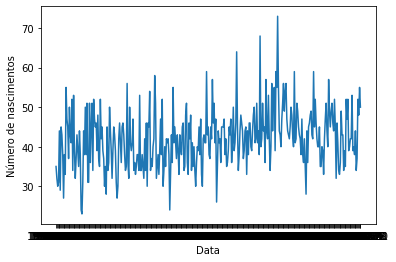

In [9]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

In [10]:
nasc["data"] = pd.to_datetime(nasc["data"])

## Data Convertida

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0.5, 0, 'Data')

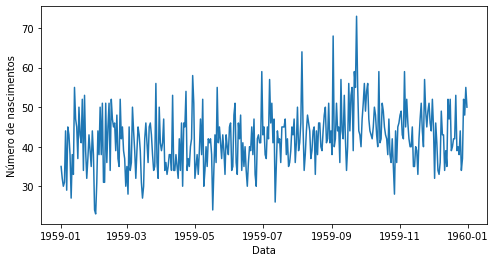

In [12]:
plt.figure(figsize = (8,4));
plt.plot(nasc["data"],nasc['n_nasc'])
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

## Vídeo 1.3

In [13]:
import numpy as np

In [14]:
media_carb = np.mean(carbonico["media"])

In [15]:
dt_carb = carbonico["data"][1]-carbonico["data"][0]

Text(0.5, 0, 'Data')

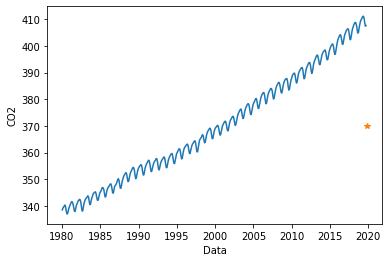

In [16]:
plt.plot(carbonico["data"],carbonico['media'])
plt.plot(carbonico.iloc[-1,0]+dt_carb,media_carb, '*')
plt.ylabel("CO2")
plt.xlabel("Data")

In [17]:
media_nasc = np.mean(nasc["n_nasc"])

In [18]:
dt_nasc = nasc["data"][1]-nasc["data"][0]

Text(0.5, 0, 'Data')

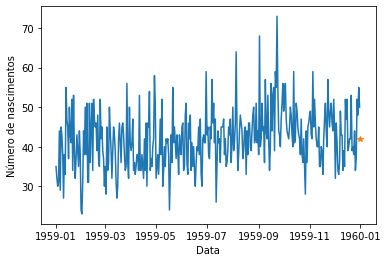

In [19]:
plt.plot(nasc["data"],nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_nasc, '*')
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

In [20]:
carbonico.shape

(477, 2)

In [21]:
media_tres_pontos_c = np.mean(carbonico["media"][len(carbonico["media"])-3:])

Text(0.5, 0, 'Data')

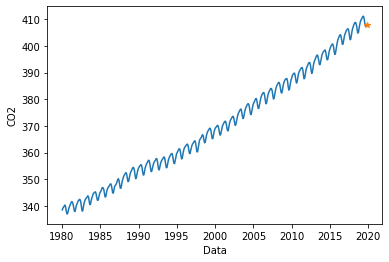

In [22]:
plt.plot(carbonico["data"],carbonico['media'])
plt.plot(carbonico.iloc[-1,0]+dt_carb,media_tres_pontos_c, '*')
plt.ylabel("CO2")
plt.xlabel("Data")

In [23]:
nasc.shape

(365, 2)

In [24]:
media_tres_pontos_n = np.mean(nasc["n_nasc"][len(nasc["n_nasc"])-3:])

Text(0.5, 0, 'Data')

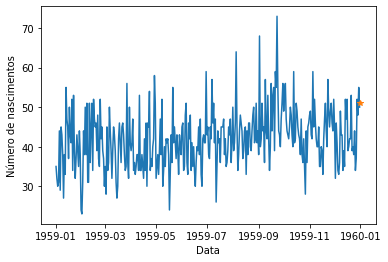

In [25]:
plt.plot(nasc["data"],nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_tres_pontos_n, '*')
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

In [26]:
media_movel_c = carbonico.rolling(5).mean()

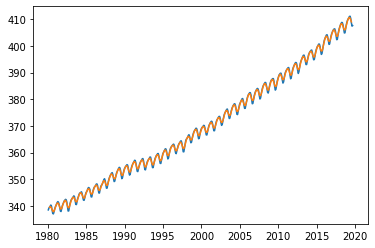

In [27]:
plt.plot(carbonico['data'],carbonico['media'])
plt.plot(media_movel_c['data'],media_movel_c['media'])

In [28]:
nasc

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [29]:
nasc['media'] = nasc['n_nasc'].rolling(5).mean()

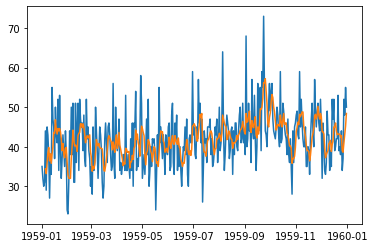

In [30]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.plot(nasc['data'],nasc['media'])

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
result_c = seasonal_decompose(carbonico.set_index('data'), freq=35)

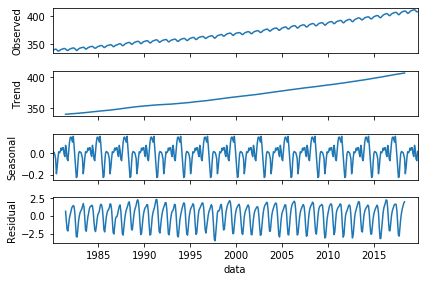

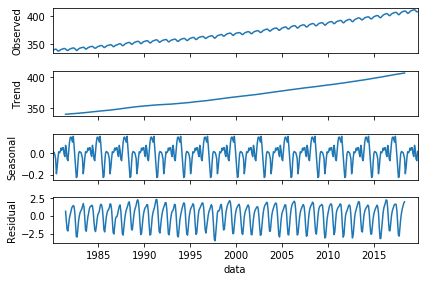

In [33]:
result_c.plot()

In [34]:
nasc_plot = nasc.drop(['media'],1)

In [35]:
result_n = seasonal_decompose(nasc_plot.set_index('data'), freq=35)

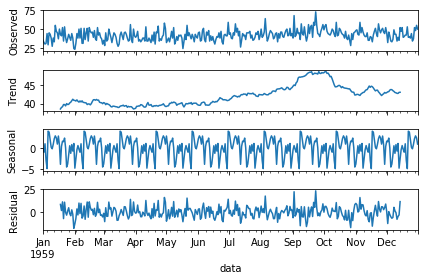

In [36]:
result_n.plot();

## Verificar estacionariedade da série

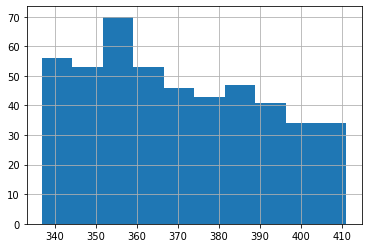

In [37]:
carbonico['media'].hist()

In [38]:
divide = int(len(carbonico)/2)

In [39]:
x = carbonico['media'].values

In [40]:
c1, c2 = x[0:divide],x[divide:]

In [41]:
print("{} - {}".format(c1.mean().round(2),c2.mean().round(2)))

352.32 - 387.82


In [42]:
print("{} - {}".format(c1.var().round(2),c2.var().round(2)))

73.9 - 151.54


In [43]:
divide = int(len(nasc)/2)

In [44]:
x = nasc['n_nasc'].values

In [45]:
n1, n2 = x[0:divide], x[divide:]

In [46]:
print("{} - {}".format(n1.mean().round(2),n2.mean().round(2)))

39.76 - 44.19


In [47]:
print("{} - {}".format(n1.var().round(2),n2.var().round(2)))

49.21 - 48.71


In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
resultado_c = adfuller(carbonico['media'].values)

In [50]:
print('Estatística ADF: {}'.format(resultado_c[0].round(2)))
print('p-valor: {}'.format(resultado_c[1]))

Estatística ADF: 3.04
p-valor: 1.0


In [51]:
resultado_n = adfuller(nasc['n_nasc'].values)

In [52]:
print('Estatística ADF: {}'.format(resultado_n[0].round(2)))
print('p-valor: {}'.format(resultado_n[1]))

Estatística ADF: -4.81
p-valor: 5.2434129901498554e-05


## Diferenciação

In [53]:
serie_diferenciada = nasc['n_nasc'].diff()

Text(0.5, 0, 'Data')

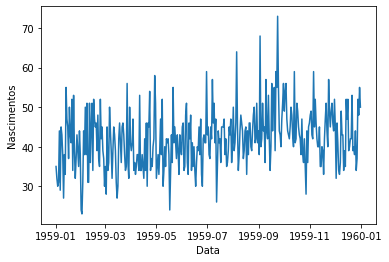

In [54]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.ylabel('Nascimentos')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

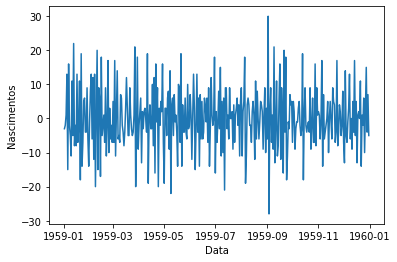

In [55]:
plt.plot(nasc ['data'],serie_diferenciada)
plt.ylabel('Nascimentos')
plt.xlabel('Data')

## Suavização exponencial

In [56]:
carbonico = carbonico.set_index('data')

In [57]:
carbonico_treino = carbonico[1980.042:2015]

In [58]:
carbonico_teste = carbonico[2015:]

In [59]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [60]:
modelo_ajustado = SimpleExpSmoothing(carbonico_treino).fit(smoothing_level=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [61]:
carbonico_teste.shape

(57, 1)

In [62]:
modelo_previsto = modelo_ajustado.forecast(57)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


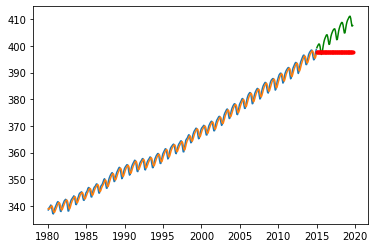

In [63]:
plt.plot(carbonico_treino)
plt.plot(carbonico_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(carbonico_teste,'g')
plt.plot(carbonico_teste.index, modelo_previsto, 'r.')

In [64]:
nasc_pred = nasc_plot.set_index('data')

In [65]:
nasc_treino = nasc_pred['1959-01-01':'1959-12-01'].astype('double')

In [66]:
nasc_teste = nasc_pred['1959-12-01':]

In [67]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [68]:
nasc_teste.shape[0]

31

In [69]:
modelo_previsto = modelo_ajustado.forecast(31)

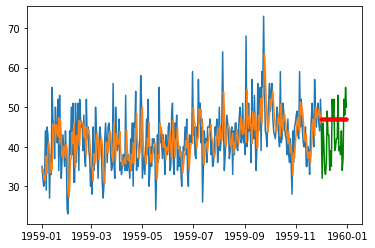

In [70]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index, modelo_previsto, 'r.')

## Método de Holt-Winters

Considera nível, tendência, sazonalidade e ruído do modelo, pode ser aditivo ou multiplicativo.

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [72]:
modelo_ajustado = ExponentialSmoothing(carbonico.values, 
trend = 'additive', seasonal='additive', seasonal_periods = 35).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [73]:
carbonico.shape

(477, 1)

In [74]:
carbonico_teste.shape

(57, 1)

In [75]:
len(carbonico) - len(carbonico_teste)

420

In [76]:
modelo_previsto = modelo_ajustado.predict(start = len(carbonico) - len(carbonico_teste),end=len(carbonico)-1)

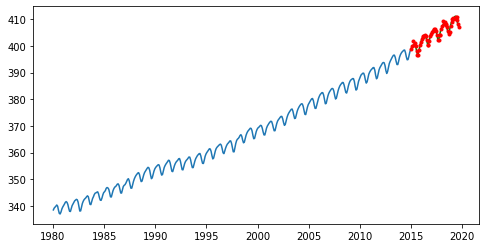

In [77]:
plt.figure(figsize=(8,4))
plt.plot(carbonico_treino)
plt.plot(carbonico_teste,'g')
plt.plot(carbonico_teste.index, modelo_previsto, 'r.')

In [78]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values,trend = 'multiplicative', seasonal=None).fit()

In [79]:
modelo_previsto_suave = modelo_ajustado.predict(start = 335,end = 365) 

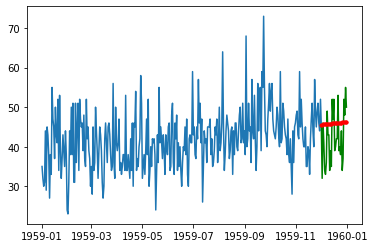

In [80]:
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index, modelo_previsto_suave,'r.')

## Autocorrelação

In [81]:
from statsmodels.graphics.tsaplots import plot_acf

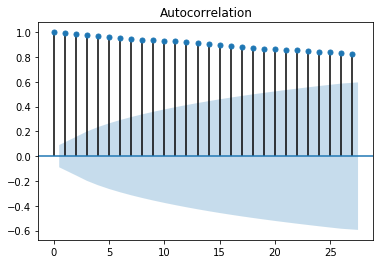

In [82]:
plot_acf(carbonico);

In [83]:
from statsmodels.graphics.tsaplots import plot_pacf

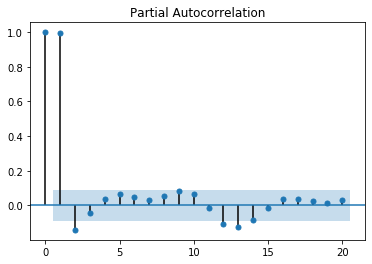

In [84]:
plot_pacf(carbonico, lags = 20);

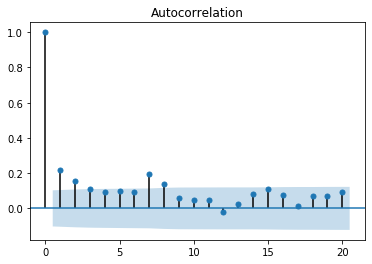

In [85]:
plot_acf(nasc['n_nasc'], lags = 20);

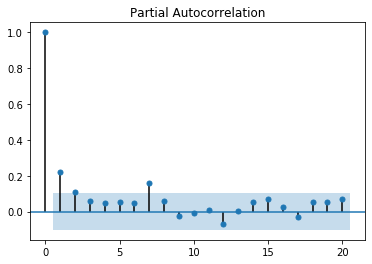

In [86]:
plot_pacf(nasc['n_nasc'], lags = 20);

In [1]:
from statsmodels.tsa.ar_model import AutoReg

ImportError: cannot import name 'AutoReg' from 'statsmodels.tsa.ar_model' (C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py)

In [223]:
lista = np.linspace(1,40,40)

In [224]:
modelo_ajustado = AR(carbonico_treino.values, lags=lista,trend='c',seasonal=True,period = 35).fit()

TypeError: __init__() got an unexpected keyword argument 'lags'